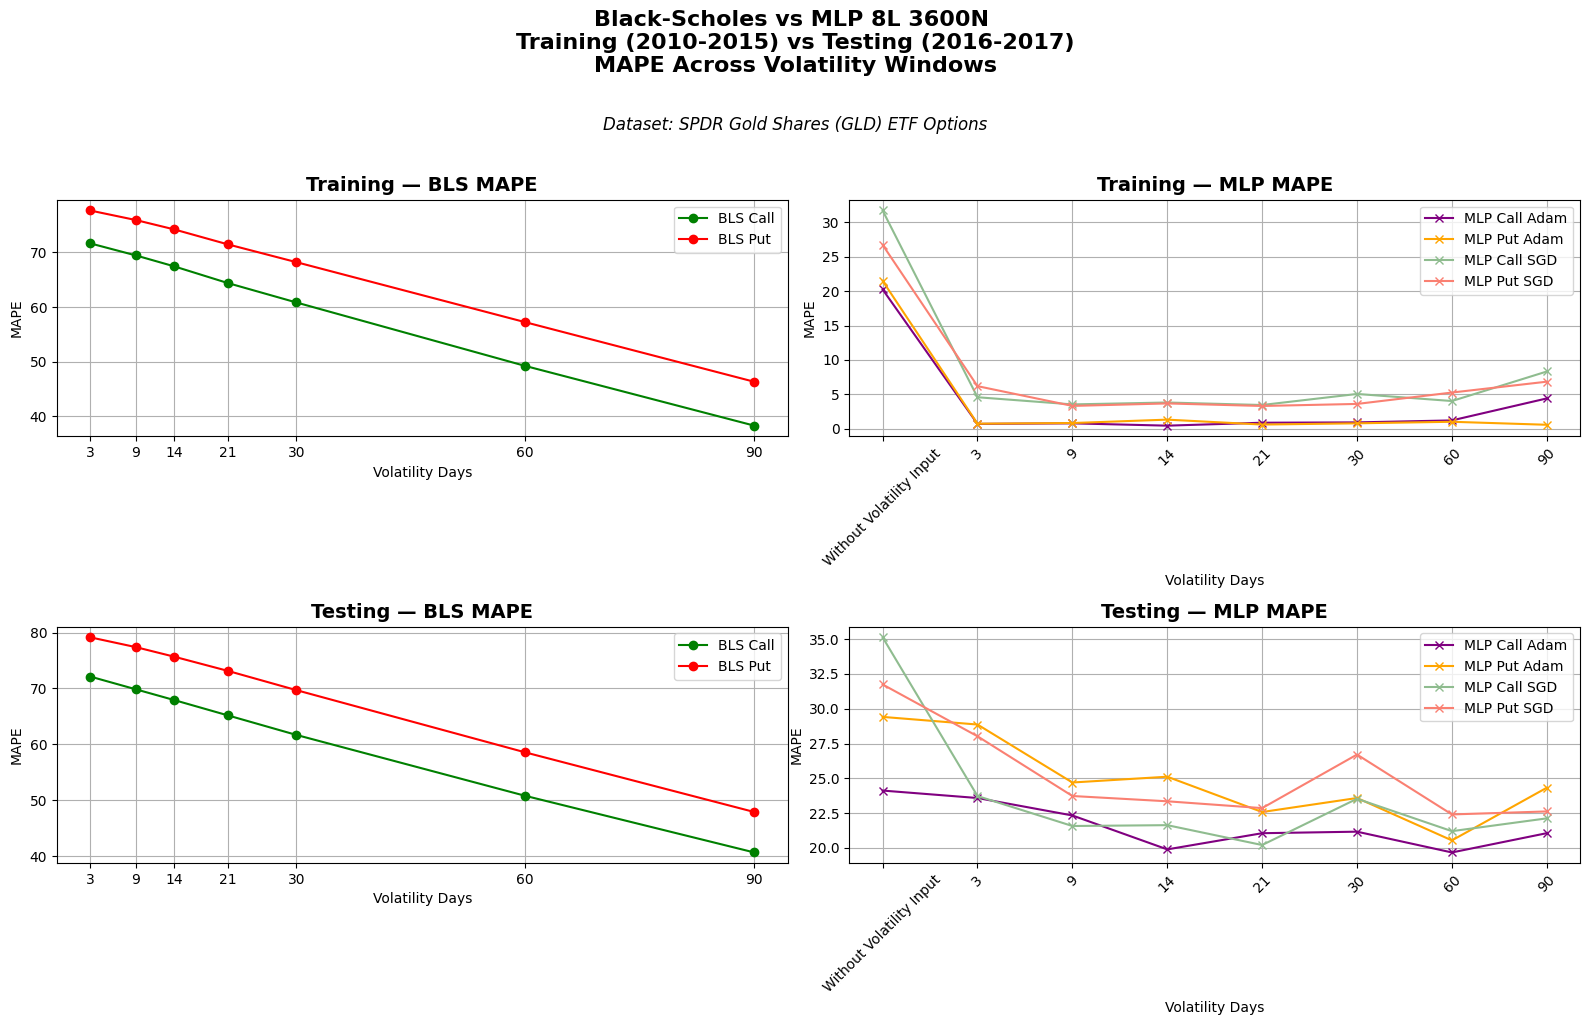

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import re


train_df = pd.read_csv("./BLS results/train/BLS_vs_MLP_Train_Metrics_by_Volatility.csv")
test_df  = pd.read_csv("./BLS results/test/BLS_vs_MLP_Test_Metrics_by_Volatility.csv")

mlp_df = pd.read_csv("./mlp/mlp_mape.csv", index_col=0)


def parse_vol_days(label):
    if 'no v' in label:
        return 0
    match = re.search(r'with (\d+)d v', label)
    return int(match.group(1)) if match else None

def parse_optimizer(label):
    return 'Adam' if 'Adam' in label else 'SGD'

mlp_df['Vol_Days'] = mlp_df.index.map(parse_vol_days)
mlp_df['Optimizer'] = mlp_df.index.map(parse_optimizer)

vol_windows = [0, 3, 9, 14, 21, 30, 60, 90]
vol_labels  = ["Without Volatility Input", 3, 9, 14, 21, 30, 60, 90]
x_vals = list(range(len(vol_windows)))
vol_to_x = {v: i for i, v in enumerate(vol_windows)}


fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()
metric = "MAPE"


ax = axes[0]
sub = train_df[train_df["Metric"] == metric]
ax.plot(sub["Vol_Days"], sub["BLS_Call"], "o-", color="green", label="BLS Call")
ax.plot(sub["Vol_Days"], sub["BLS_Put"],  "o-", color="red",   label="BLS Put")
ax.set_title("Training — BLS MAPE", fontsize=14, fontweight="bold")
ax.set_xlabel("Volatility Days")
ax.set_ylabel("MAPE")
ax.set_xticks(vol_windows[1:])  
ax.grid(True)
ax.legend()

ax = axes[1]
for opt, c_call, c_put in zip(["Adam","SGD"], ["purple","darkseagreen"], ["orange","salmon"]):
    df_opt = mlp_df[mlp_df["Optimizer"] == opt].groupby("Vol_Days")[["Call Train","Put Train"]].mean()
    df_opt = df_opt.reindex(vol_windows) 
    ax.plot(x_vals, df_opt["Call Train"], marker="x", color=c_call, label=f"MLP Call {opt}")
    ax.plot(x_vals, df_opt["Put Train"], marker="x", color=c_put, label=f"MLP Put {opt}")

ax.set_title("Training — MLP MAPE", fontsize=14, fontweight="bold")
ax.set_xlabel("Volatility Days")
ax.set_ylabel("MAPE")
ax.set_xticks(x_vals)
ax.set_xticklabels(vol_labels, rotation=45)
ax.grid(True)
ax.legend()


ax = axes[2]
sub_test = test_df[test_df["Metric"] == metric]
ax.plot(sub_test["Vol_Days"], sub_test["BLS_Call"], "o-", color="green", label="BLS Call")
ax.plot(sub_test["Vol_Days"], sub_test["BLS_Put"],  "o-", color="red",   label="BLS Put")
ax.set_title("Testing — BLS MAPE", fontsize=14, fontweight="bold")
ax.set_xlabel("Volatility Days")
ax.set_ylabel("MAPE")
ax.set_xticks(vol_windows[1:])
ax.grid(True)
ax.legend()


ax = axes[3]
for opt, c_call, c_put in zip(["Adam","SGD"], ["purple","darkseagreen"], ["orange","salmon"]):
    df_opt = mlp_df[mlp_df["Optimizer"] == opt].groupby("Vol_Days")[["Call Test","Put Test"]].mean()
    df_opt = df_opt.reindex(vol_windows)  
    ax.plot(x_vals, df_opt["Call Test"], marker="x", color=c_call, label=f"MLP Call {opt}")
    ax.plot(x_vals, df_opt["Put Test"], marker="x", color=c_put, label=f"MLP Put {opt}")

ax.set_title("Testing — MLP MAPE", fontsize=14, fontweight="bold")
ax.set_xlabel("Volatility Days")
ax.set_ylabel("MAPE")
ax.set_xticks(x_vals)
ax.set_xticklabels(vol_labels, rotation=45)
ax.grid(True)
ax.legend()


plt.suptitle(
    "Black-Scholes vs MLP 8L 3600N \nTraining (2010-2015) vs Testing (2016-2017)\nMAPE Across Volatility Windows",
    fontsize=16,
    fontweight="bold",
    y=1.02
)
plt.figtext(
    0.5, 0.9,
    "Dataset: SPDR Gold Shares (GLD) ETF Options",
    ha="center",
    fontsize=12,
    style="italic"
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("BLS_vs_MLP_Train_vs_Test_MAPE_FixedVol.pdf", dpi=300)
plt.show()


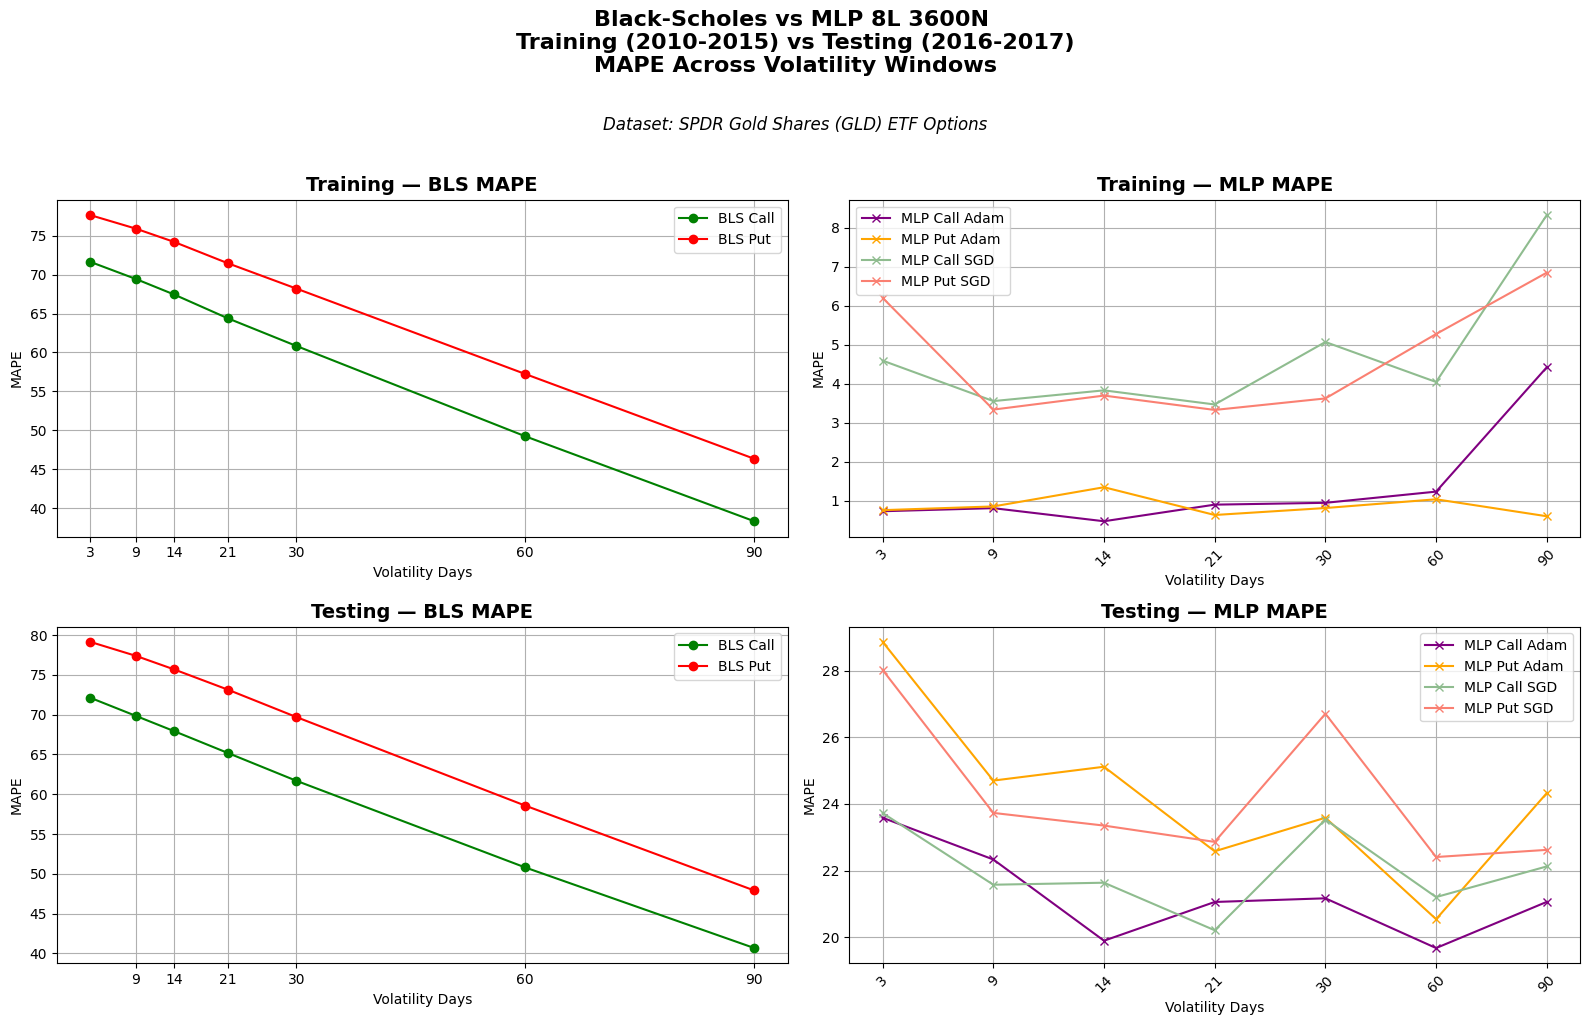

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import re


train_df = pd.read_csv("./BLS results/train/BLS_vs_MLP_Train_Metrics_by_Volatility.csv")
test_df  = pd.read_csv("./BLS results/test/BLS_vs_MLP_Test_Metrics_by_Volatility.csv")


mlp_df = pd.read_csv("./mlp/mlp_mape.csv", index_col=0)


def parse_vol_days(label):
    if 'no v' in label:
        return 0
    match = re.search(r'with (\d+)d v', label)
    return int(match.group(1)) if match else None

def parse_optimizer(label):
    return 'Adam' if 'Adam' in label else 'SGD'

mlp_df['Vol_Days'] = mlp_df.index.map(parse_vol_days)
mlp_df['Optimizer'] = mlp_df.index.map(parse_optimizer)

vol_windows = [3, 9, 14, 21, 30, 60, 90]
vol_labels  = [3, 9, 14, 21, 30, 60, 90]
x_vals = list(range(len(vol_windows)))
vol_to_x = {v: i for i, v in enumerate(vol_windows)}


fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()
metric = "MAPE"

ax = axes[0]
sub = train_df[train_df["Metric"] == metric]
ax.plot(sub["Vol_Days"], sub["BLS_Call"], "o-", color="green", label="BLS Call")
ax.plot(sub["Vol_Days"], sub["BLS_Put"],  "o-", color="red",   label="BLS Put")
ax.set_title("Training — BLS MAPE", fontsize=14, fontweight="bold")
ax.set_xlabel("Volatility Days")
ax.set_ylabel("MAPE")
ax.set_xticks(vol_windows[0:]) 
ax.grid(True)
ax.legend()


ax = axes[1]
for opt, c_call, c_put in zip(["Adam","SGD"], ["purple","darkseagreen"], ["orange","salmon"]):
    df_opt = mlp_df[mlp_df["Optimizer"] == opt].groupby("Vol_Days")[["Call Train","Put Train"]].mean()
    df_opt = df_opt.reindex(vol_windows) 
    ax.plot(x_vals, df_opt["Call Train"], marker="x", color=c_call, label=f"MLP Call {opt}")
    ax.plot(x_vals, df_opt["Put Train"], marker="x", color=c_put, label=f"MLP Put {opt}")

ax.set_title("Training — MLP MAPE", fontsize=14, fontweight="bold")
ax.set_xlabel("Volatility Days")
ax.set_ylabel("MAPE")
ax.set_xticks(x_vals)
ax.set_xticklabels(vol_labels, rotation=45)
ax.grid(True)
ax.legend()


ax = axes[2]
sub_test = test_df[test_df["Metric"] == metric]
ax.plot(sub_test["Vol_Days"], sub_test["BLS_Call"], "o-", color="green", label="BLS Call")
ax.plot(sub_test["Vol_Days"], sub_test["BLS_Put"],  "o-", color="red",   label="BLS Put")
ax.set_title("Testing — BLS MAPE", fontsize=14, fontweight="bold")
ax.set_xlabel("Volatility Days")
ax.set_ylabel("MAPE")
ax.set_xticks(vol_windows[1:])
ax.grid(True)
ax.legend()


ax = axes[3]
for opt, c_call, c_put in zip(["Adam","SGD"], ["purple","darkseagreen"], ["orange","salmon"]):
    df_opt = mlp_df[mlp_df["Optimizer"] == opt].groupby("Vol_Days")[["Call Test","Put Test"]].mean()
    df_opt = df_opt.reindex(vol_windows)  
    ax.plot(x_vals, df_opt["Call Test"], marker="x", color=c_call, label=f"MLP Call {opt}")
    ax.plot(x_vals, df_opt["Put Test"], marker="x", color=c_put, label=f"MLP Put {opt}")

ax.set_title("Testing — MLP MAPE", fontsize=14, fontweight="bold")
ax.set_xlabel("Volatility Days")
ax.set_ylabel("MAPE")
ax.set_xticks(x_vals)
ax.set_xticklabels(vol_labels, rotation=45)
ax.grid(True)
ax.legend()


plt.suptitle(
    "Black-Scholes vs MLP 8L 3600N \nTraining (2010-2015) vs Testing (2016-2017)\nMAPE Across Volatility Windows",
    fontsize=16,
    fontweight="bold",
    y=1.02
)
plt.figtext(
    0.5, 0.9,
    "Dataset: SPDR Gold Shares (GLD) ETF Options",
    ha="center",
    fontsize=12,
    style="italic"
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("BLS_vs_MLP_Train_vs_Test_MAPE_3-90.pdf", dpi=300)
plt.show()


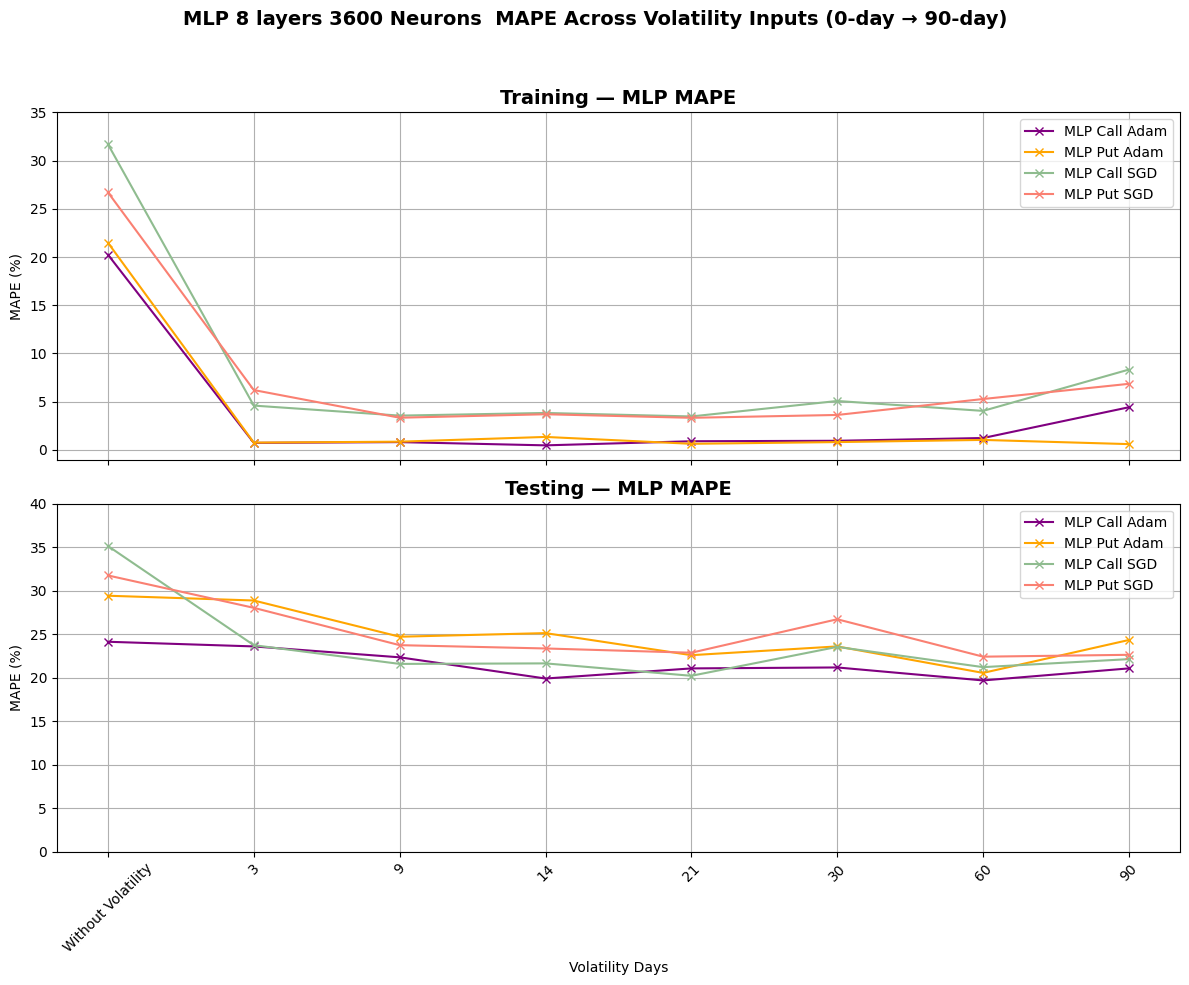

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re


mlp_df = pd.read_csv("./mlp/mlp_mape.csv", index_col=0)


def parse_vol_days(label):
    if 'no v' in label:
        return 0
    match = re.search(r'with (\d+)d v', label)
    return int(match.group(1)) if match else None

def parse_optimizer(label):
    return 'Adam' if 'Adam' in label else 'SGD'

mlp_df['Vol_Days'] = mlp_df.index.map(parse_vol_days)
mlp_df['Optimizer'] = mlp_df.index.map(parse_optimizer)


vol_windows = sorted(mlp_df['Vol_Days'].unique())
x_vals = list(range(len(vol_windows)))


fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)


ax = axes[0]
for opt, c_call, c_put in zip(["Adam","SGD"], ["purple","darkseagreen"], ["orange","salmon"]):
    df_opt = mlp_df[mlp_df["Optimizer"] == opt].groupby("Vol_Days")[["Call Train","Put Train"]].mean()
    df_opt = df_opt.reindex(vol_windows)
    ax.plot(x_vals, df_opt["Call Train"], marker="x", color=c_call, label=f"MLP Call {opt}")
    ax.plot(x_vals, df_opt["Put Train"], marker="x", color=c_put, label=f"MLP Put {opt}")

ax.set_title("Training — MLP MAPE", fontsize=14, fontweight="bold")
ax.set_ylabel("MAPE (%)")

y_min, y_max = 0, np.ceil(mlp_df[["Call Train","Put Train"]].max().max()/5)*5
ax.set_yticks(np.arange(y_min, y_max+1, 5))
ax.grid(True)
ax.legend()


ax = axes[1]
for opt, c_call, c_put in zip(["Adam","SGD"], ["purple","darkseagreen"], ["orange","salmon"]):
    df_opt = mlp_df[mlp_df["Optimizer"] == opt].groupby("Vol_Days")[["Call Test","Put Test"]].mean()
    df_opt = df_opt.reindex(vol_windows)
    ax.plot(x_vals, df_opt["Call Test"], marker="x", color=c_call, label=f"MLP Call {opt}")
    ax.plot(x_vals, df_opt["Put Test"], marker="x", color=c_put, label=f"MLP Put {opt}")

ax.set_title("Testing — MLP MAPE", fontsize=14, fontweight="bold")
ax.set_xlabel("Volatility Days")
ax.set_ylabel("MAPE (%)")
ax.set_xticks(x_vals)
ax.set_xticklabels([str(v) if v>0 else "Without Volatility" for v in vol_windows], rotation=45)
y_min, y_max = 0, np.ceil(mlp_df[["Call Test","Put Test"]].max().max()/5)*5
ax.set_yticks(np.arange(y_min, y_max+1, 5))
ax.grid(True)
ax.legend()

plt.suptitle(
    "MLP 8 layers 3600 Neurons  MAPE Across Volatility Inputs (0-day → 90-day)",
    fontsize=14, fontweight="bold"
)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("MLP_MAPE_0-90d.pdf", dpi=300)
plt.show()


In [8]:
import pandas as pd
import re

train_bls = pd.read_csv("./BLS results/train/BLS_vs_MLP_Train_Metrics_by_Volatility.csv")
test_bls  = pd.read_csv("./BLS results/test/BLS_vs_MLP_Test_Metrics_by_Volatility.csv")
mlp_train = pd.read_csv("./mlp/mlp_mape.csv", index_col=0)


def parse_vol_days(row_name):
    match = re.search(r'with (\d+)d v', row_name)
    if match:
        return int(match.group(1))
    elif 'no v' in row_name:
        return 0
    else:
        return None

def parse_optimizer(row_name):
    return 'SGD' if 'SGD' in row_name else 'Adam'

mlp_train['Vol_Days'] = mlp_train.index.map(parse_vol_days)
mlp_train['Optimizer'] = mlp_train.index.map(parse_optimizer)


vol_windows = [3, 9, 14, 21, 30, 60, 90]


def compute_improvement(bls_df, mlp_df, period='Train'):
    rows = []
    for vol in vol_windows:
        bls_row = bls_df[bls_df['Vol_Days']==vol]
        mlp_rows = mlp_df[mlp_df['Vol_Days']==vol]

        if bls_row.empty or mlp_rows.empty:
            continue

        bls_call = bls_row['BLS_Call'].values[0] * 100
        bls_put  = bls_row['BLS_Put'].values[0] * 100

        if period=='Train':
            mlp_call = mlp_rows['Call Train'].mean()
            mlp_put  = mlp_rows['Put Train'].mean()
        else:
            mlp_call = mlp_rows['Call Test'].mean()
            mlp_put  = mlp_rows['Put Test'].mean()

        call_impr = (bls_call - mlp_call)/bls_call*100
        put_impr  = (bls_put - mlp_put)/bls_put*100

        rows.append({'Vol_Days': vol,
                     'BLS_Call_%': bls_call,
                     'BLS_Put_%': bls_put,
                     'MLP_Call_%': mlp_call,
                     'MLP_Put_%': mlp_put,
                     'Call_Improvement_%': call_impr,
                     'Put_Improvement_%': put_impr})
    return pd.DataFrame(rows)

train_df = compute_improvement(train_bls, mlp_train, period='Train')
test_df  = compute_improvement(test_bls,  mlp_train, period='Test')


ranges = {
    'Short': [3, 9],
    'Mid':   [14, 21, 30],
    'Long':  [60, 90]
}

def aggregate_ranges(df):
    rows = []
    for rname, vols in ranges.items():
        sub = df[df['Vol_Days'].isin(vols)]
        rows.append({
            'Range': rname,
            'BLS_Call_%': sub['BLS_Call_%'].mean(),
            'BLS_Put_%': sub['BLS_Put_%'].mean(),
            'MLP_Call_%': sub['MLP_Call_%'].mean(),
            'MLP_Put_%': sub['MLP_Put_%'].mean(),
            'Call_Improvement_%': sub['Call_Improvement_%'].mean(),
            'Put_Improvement_%': sub['Put_Improvement_%'].mean()
        })
    return pd.DataFrame(rows)

train_range = aggregate_ranges(train_df)
test_range  = aggregate_ranges(test_df)


with pd.ExcelWriter("MLP_vs_BLS_MAPE_summary.xlsx") as writer:
    train_df.to_excel(writer, sheet_name="Training MAPE Detailed", index=False)
    test_df.to_excel(writer, sheet_name="Testing MAPE Detailed", index=False)
    train_range.to_excel(writer, sheet_name="Training MAPE Range", index=False)
    test_range.to_excel(writer, sheet_name="Testing MAPE Range", index=False)


print("\n=== Training MAPE Improvement & Mean Values by Range ===")
for _, row in train_range.iterrows():
    print(f"\n{row['Range']} Term Windows:")
    print(f" BLS Call MAPE: {row['BLS_Call_%']:.2f}%  |  MLP Call MAPE: {row['MLP_Call_%']:.2f}%  |  Improvement: {row['Call_Improvement_%']:.2f}%")
    print(f" BLS Put MAPE:  {row['BLS_Put_%']:.2f}%  |  MLP Put MAPE:  {row['MLP_Put_%']:.2f}%  |  Improvement: {row['Put_Improvement_%']:.2f}%")

print("\n=== Testing MAPE Improvement & Mean Values by Range ===")
for _, row in test_range.iterrows():
    print(f"\n{row['Range']} Term Windows:")
    print(f" BLS Call MAPE: {row['BLS_Call_%']:.2f}%  |  MLP Call MAPE: {row['MLP_Call_%']:.2f}%  |  Improvement: {row['Call_Improvement_%']:.2f}%")
    print(f" BLS Put MAPE:  {row['BLS_Put_%']:.2f}%  |  MLP Put MAPE:  {row['MLP_Put_%']:.2f}%  |  Improvement: {row['Put_Improvement_%']:.2f}%")



=== Training MAPE Improvement & Mean Values by Range ===

Short Term Windows:
 BLS Call MAPE: 75.97%  |  MLP Call MAPE: 2.42%  |  Improvement: 96.82%
 BLS Put MAPE:  78.72%  |  MLP Put MAPE:  2.79%  |  Improvement: 96.47%

Mid Term Windows:
 BLS Call MAPE: 68.37%  |  MLP Call MAPE: 2.45%  |  Improvement: 96.39%
 BLS Put MAPE:  72.14%  |  MLP Put MAPE:  2.24%  |  Improvement: 96.90%

Long Term Windows:
 BLS Call MAPE: 46.73%  |  MLP Call MAPE: 4.51%  |  Improvement: 89.76%
 BLS Put MAPE:  51.77%  |  MLP Put MAPE:  3.44%  |  Improvement: 93.23%

=== Testing MAPE Improvement & Mean Values by Range ===

Short Term Windows:
 BLS Call MAPE: 70.85%  |  MLP Call MAPE: 22.81%  |  Improvement: 67.82%
 BLS Put MAPE:  72.71%  |  MLP Put MAPE:  26.33%  |  Improvement: 63.82%

Mid Term Windows:
 BLS Call MAPE: 64.52%  |  MLP Call MAPE: 21.25%  |  Improvement: 66.96%
 BLS Put MAPE:  67.31%  |  MLP Put MAPE:  24.04%  |  Improvement: 64.22%

Long Term Windows:
 BLS Call MAPE: 46.24%  |  MLP Call MAPE: